In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf

import warnings
warnings.filterwarnings("ignore")

In [2]:
# Importing dataset
df = pd.read_csv("RELIANCE[1].csv")

In [3]:
df.head(10)

Date         Open         High          Low        Close  \
0  2020-08-19  2141.000000  2154.000000  2121.350098  2131.550049   
1  2020-08-20  2120.000000  2123.899902  2088.000000  2097.050049   
2  2020-08-21  2118.000000  2122.000000  2077.000000  2081.850098   
3  2020-08-24  2091.399902  2104.500000  2070.500000  2095.750000   
4  2020-08-25  2106.000000  2111.300049  2078.000000  2082.100098   
5  2020-08-26  2085.000000  2147.949951  2047.000000  2137.300049   
6  2020-08-27  2148.000000  2150.000000  2103.250000  2110.600098   
7  2020-08-28  2120.000000  2132.899902  2106.250000  2116.149902   
8  2020-08-31  2174.000000  2174.000000  2060.350098  2080.699951   
9  2020-09-01  2100.000000  2122.399902  2062.399902  2087.250000   

     Adj Close      Volume  
0  2124.715088  15731396.0  
1  2090.325684  10401212.0  
2  2075.174316  11667129.0  
3  2089.029785  15098991.0  
4  2075.423584   8947563.0  
5  2130.446533  27630190.0  
6  2103.832275  12961252.0  
7  2109.364258  12537520.0  
8  2074.028076  28648125.0  
9  2080.556885  17821397.0

In [4]:
df.tail(10)

Date         Open         High          Low        Close  \
240  2021-08-05  2114.300049  2154.800049  2104.250000  2134.250000   
241  2021-08-06  2129.949951  2146.949951  2078.750000  2089.050049   
242  2021-08-09  2081.000000  2089.800049  2066.500000  2077.149902   
243  2021-08-10  2082.000000  2113.000000  2073.750000  2088.050049   
244  2021-08-11  2096.949951  2120.000000  2083.399902  2117.300049   
245  2021-08-12  2124.899902  2126.199951  2105.000000  2110.500000   
246  2021-08-13  2117.300049  2149.899902  2108.949951  2145.649902   
247  2021-08-16  2149.350098  2203.000000  2128.149902  2173.500000   
248  2021-08-17  2168.850098  2185.199951  2147.850098  2164.250000   
249  2021-08-18  2174.000000  2186.800049  2152.600098  2172.649902   

       Adj Close      Volume  
240  2134.250000   9807831.0  
241  2089.050049   7670583.0  
242  2077.149902   3458546.0  
243  2088.050049   5500708.0  
244  2117.300049   4238859.0  
245  2110.500000   3755507.0  
246  2145.649902   5898384.0  
247  2173.500000  10123204.0  
248  2164.250000   5841743.0  
249  2172.649902   4650008.0

Analysis is only based on Open, High, Low, close price and volume

There is no need of Adj Close

In [6]:
# Removing "Adj Close" columnfrom dataset
df1=df.drop(["Adj Close"],axis=1).reset_index(drop=True)
df1

Date         Open         High          Low        Close  \
0    2020-08-19  2141.000000  2154.000000  2121.350098  2131.550049   
1    2020-08-20  2120.000000  2123.899902  2088.000000  2097.050049   
2    2020-08-21  2118.000000  2122.000000  2077.000000  2081.850098   
3    2020-08-24  2091.399902  2104.500000  2070.500000  2095.750000   
4    2020-08-25  2106.000000  2111.300049  2078.000000  2082.100098   
..          ...          ...          ...          ...          ...   
245  2021-08-12  2124.899902  2126.199951  2105.000000  2110.500000   
246  2021-08-13  2117.300049  2149.899902  2108.949951  2145.649902   
247  2021-08-16  2149.350098  2203.000000  2128.149902  2173.500000   
248  2021-08-17  2168.850098  2185.199951  2147.850098  2164.250000   
249  2021-08-18  2174.000000  2186.800049  2152.600098  2172.649902   

         Volume  
0    15731396.0  
1    10401212.0  
2    11667129.0  
3    15098991.0  
4     8947563.0  
..          ...  
245   3755507.0  
246   5898384.0  
247  10123204.0  
248   5841743.0  
249   4650008.0  

[250 rows x 6 columns]

In [7]:
# Finding duplicate columns, if any
df1[df1.duplicated()]

Empty DataFrame
Columns: [Date, Open, High, Low, Close, Volume]
Index: []

In [8]:
# Finding null values, if any
df1.isnull().sum()

Date      0
Open      1
High      1
Low       1
Close     1
Volume    1
dtype: int64

In [9]:
#To check which rows have any missing value under any column
df1[df1.isnull().any(axis=1)]

Date  Open  High  Low  Close  Volume
62  2020-11-14   NaN   NaN  NaN    NaN     NaN

In [10]:
# Forward Imputation
df1 = df1.fillna(method='ffill')

In [11]:
df1.isnull().sum()

Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

In [12]:
# Removing the row which have null value
df2=df1.dropna().reset_index(drop=True)
df2

Date         Open         High          Low        Close  \
0    2020-08-19  2141.000000  2154.000000  2121.350098  2131.550049   
1    2020-08-20  2120.000000  2123.899902  2088.000000  2097.050049   
2    2020-08-21  2118.000000  2122.000000  2077.000000  2081.850098   
3    2020-08-24  2091.399902  2104.500000  2070.500000  2095.750000   
4    2020-08-25  2106.000000  2111.300049  2078.000000  2082.100098   
..          ...          ...          ...          ...          ...   
245  2021-08-12  2124.899902  2126.199951  2105.000000  2110.500000   
246  2021-08-13  2117.300049  2149.899902  2108.949951  2145.649902   
247  2021-08-16  2149.350098  2203.000000  2128.149902  2173.500000   
248  2021-08-17  2168.850098  2185.199951  2147.850098  2164.250000   
249  2021-08-18  2174.000000  2186.800049  2152.600098  2172.649902   

         Volume  
0    15731396.0  
1    10401212.0  
2    11667129.0  
3    15098991.0  
4     8947563.0  
..          ...  
245   3755507.0  
246   5898384.0  
247  10123204.0  
248   5841743.0  
249   4650008.0  

[250 rows x 6 columns]

In [13]:
# Checking wether if there exist any null values
df2[df2.isnull().any(axis=1)]

Empty DataFrame
Columns: [Date, Open, High, Low, Close, Volume]
Index: []

In [14]:
# Making a copy of dataset as reliance
df=df2.copy()
df

Date         Open         High          Low        Close  \
0    2020-08-19  2141.000000  2154.000000  2121.350098  2131.550049   
1    2020-08-20  2120.000000  2123.899902  2088.000000  2097.050049   
2    2020-08-21  2118.000000  2122.000000  2077.000000  2081.850098   
3    2020-08-24  2091.399902  2104.500000  2070.500000  2095.750000   
4    2020-08-25  2106.000000  2111.300049  2078.000000  2082.100098   
..          ...          ...          ...          ...          ...   
245  2021-08-12  2124.899902  2126.199951  2105.000000  2110.500000   
246  2021-08-13  2117.300049  2149.899902  2108.949951  2145.649902   
247  2021-08-16  2149.350098  2203.000000  2128.149902  2173.500000   
248  2021-08-17  2168.850098  2185.199951  2147.850098  2164.250000   
249  2021-08-18  2174.000000  2186.800049  2152.600098  2172.649902   

         Volume  
0    15731396.0  
1    10401212.0  
2    11667129.0  
3    15098991.0  
4     8947563.0  
..          ...  
245   3755507.0  
246   5898384.0  
247  10123204.0  
248   5841743.0  
249   4650008.0  

[250 rows x 6 columns]

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    250 non-null    object 
 1   Open    250 non-null    float64
 2   High    250 non-null    float64
 3   Low     250 non-null    float64
 4   Close   250 non-null    float64
 5   Volume  250 non-null    float64
dtypes: float64(5), object(1)
memory usage: 11.8+ KB


In [16]:
df.describe()

Open         High          Low        Close        Volume
count   250.000000   250.000000   250.000000   250.000000  2.500000e+02
mean   2067.670800  2089.402191  2040.576607  2062.510805  1.173658e+07
std     110.148124   111.261206   108.269093   109.516837  7.607395e+06
min    1837.000000  1905.000000  1830.000000  1841.949951  3.099956e+06
25%    1980.024994  1997.599976  1960.024994  1976.212494  6.831975e+06
50%    2066.550049  2087.400024  2035.049988  2055.525024  9.606120e+06
75%    2135.949951  2153.537537  2104.000000  2133.575012  1.419827e+07
max    2325.000000  2369.350098  2310.550049  2324.550049  6.475046e+07

In [17]:
# converting the date column in to datetime 
df['Date']=pd.to_datetime(df['Date'],format='%Y-%m-%d')
df

Date         Open         High          Low        Close      Volume
0   2020-08-19  2141.000000  2154.000000  2121.350098  2131.550049  15731396.0
1   2020-08-20  2120.000000  2123.899902  2088.000000  2097.050049  10401212.0
2   2020-08-21  2118.000000  2122.000000  2077.000000  2081.850098  11667129.0
3   2020-08-24  2091.399902  2104.500000  2070.500000  2095.750000  15098991.0
4   2020-08-25  2106.000000  2111.300049  2078.000000  2082.100098   8947563.0
..         ...          ...          ...          ...          ...         ...
245 2021-08-12  2124.899902  2126.199951  2105.000000  2110.500000   3755507.0
246 2021-08-13  2117.300049  2149.899902  2108.949951  2145.649902   5898384.0
247 2021-08-16  2149.350098  2203.000000  2128.149902  2173.500000  10123204.0
248 2021-08-17  2168.850098  2185.199951  2147.850098  2164.250000   5841743.0
249 2021-08-18  2174.000000  2186.800049  2152.600098  2172.649902   4650008.0

[250 rows x 6 columns]

In [18]:
# Setting the date column as index
df=df.set_index('Date')
df

Open         High          Low        Close      Volume
Date                                                                      
2020-08-19  2141.000000  2154.000000  2121.350098  2131.550049  15731396.0
2020-08-20  2120.000000  2123.899902  2088.000000  2097.050049  10401212.0
2020-08-21  2118.000000  2122.000000  2077.000000  2081.850098  11667129.0
2020-08-24  2091.399902  2104.500000  2070.500000  2095.750000  15098991.0
2020-08-25  2106.000000  2111.300049  2078.000000  2082.100098   8947563.0
...                 ...          ...          ...          ...         ...
2021-08-12  2124.899902  2126.199951  2105.000000  2110.500000   3755507.0
2021-08-13  2117.300049  2149.899902  2108.949951  2145.649902   5898384.0
2021-08-16  2149.350098  2203.000000  2128.149902  2173.500000  10123204.0
2021-08-17  2168.850098  2185.199951  2147.850098  2164.250000   5841743.0
2021-08-18  2174.000000  2186.800049  2152.600098  2172.649902   4650008.0

[250 rows x 5 columns]

Text(0.5, 1.0, 'Close')

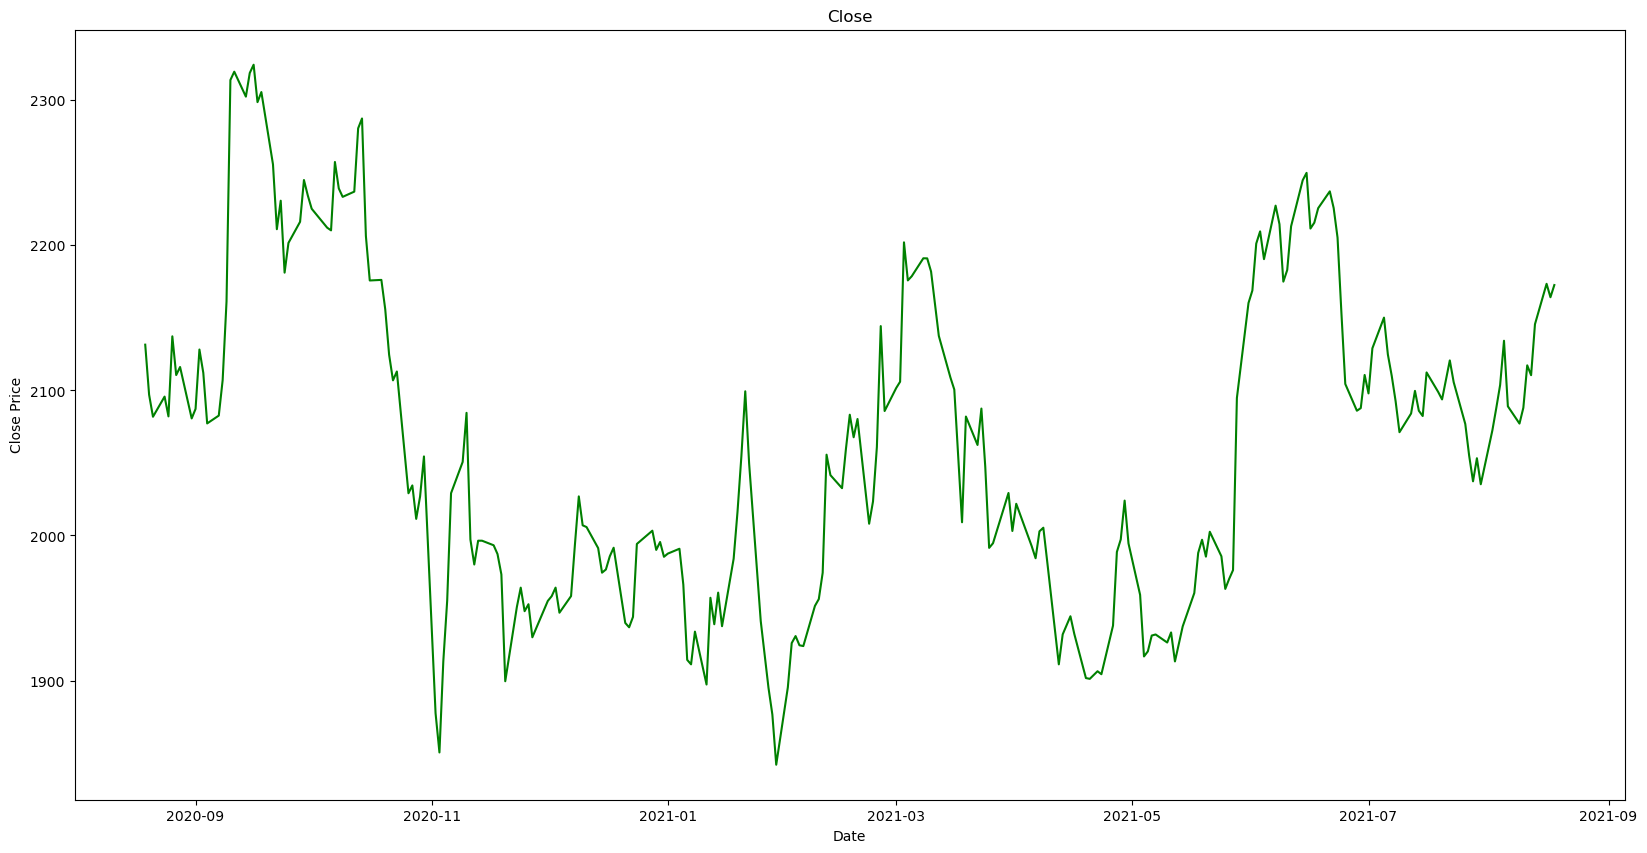

In [19]:
plt.figure(figsize=(20,10))

#Close Column Plot

plt.plot(df['Close'],color='green')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Close')

Text(0.5, 1.0, 'Close')

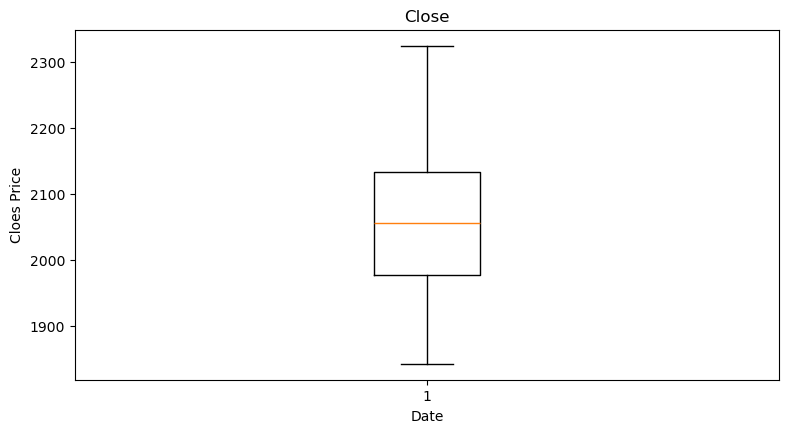

In [20]:
# Creating box-plots
plt.figure(figsize=(20,10))

#Close Column Plot
plt.subplot(2,2,2)
plt.boxplot(df['Close'])
plt.xlabel('Date')
plt.ylabel('Cloes Price')
plt.title('Close')

From the box plot it is clear that there are no outliers inthe dataset



Text(0.5, 1.0, 'Close')

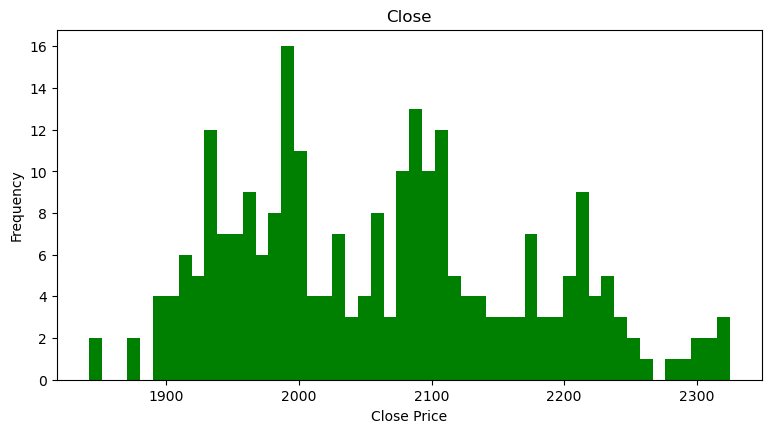

In [22]:
# Ploting Histogram
plt.figure(figsize=(20,10))
#Close Column Plot
plt.subplot(2,2,2)
plt.hist(df['Close'],bins=50, color='green')
plt.xlabel("Close Price")
plt.ylabel("Frequency")
plt.title('Close')

Text(0.5, 1.0, 'Close')

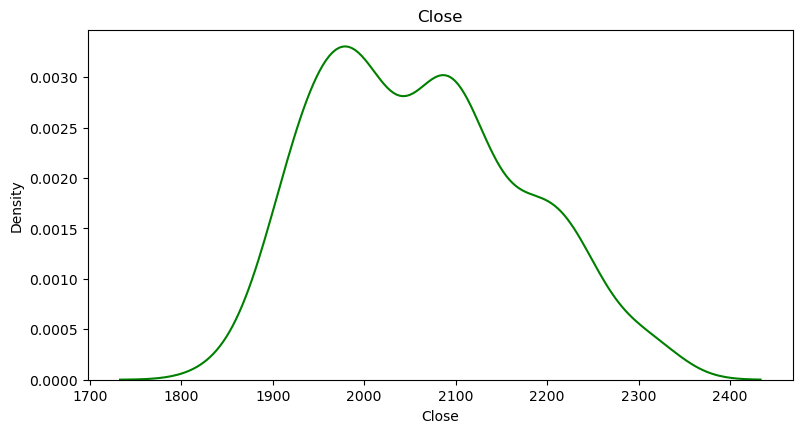

In [23]:
# KDE-Plots
plt.figure(figsize=(20,10))
#Close Column Plot
plt.subplot(2,2,2)
sns.kdeplot(df['Close'], color='green')
plt.title('Close')

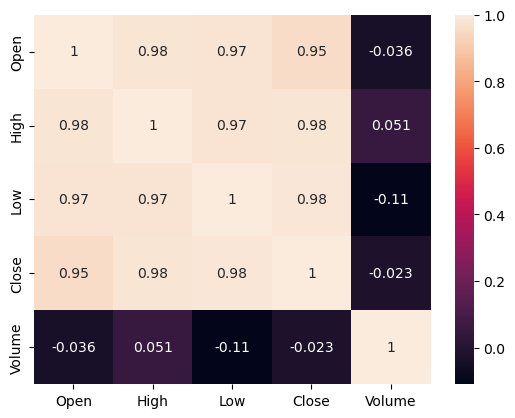

In [24]:
sns.heatmap(df.corr(),annot=True)
plt.show()

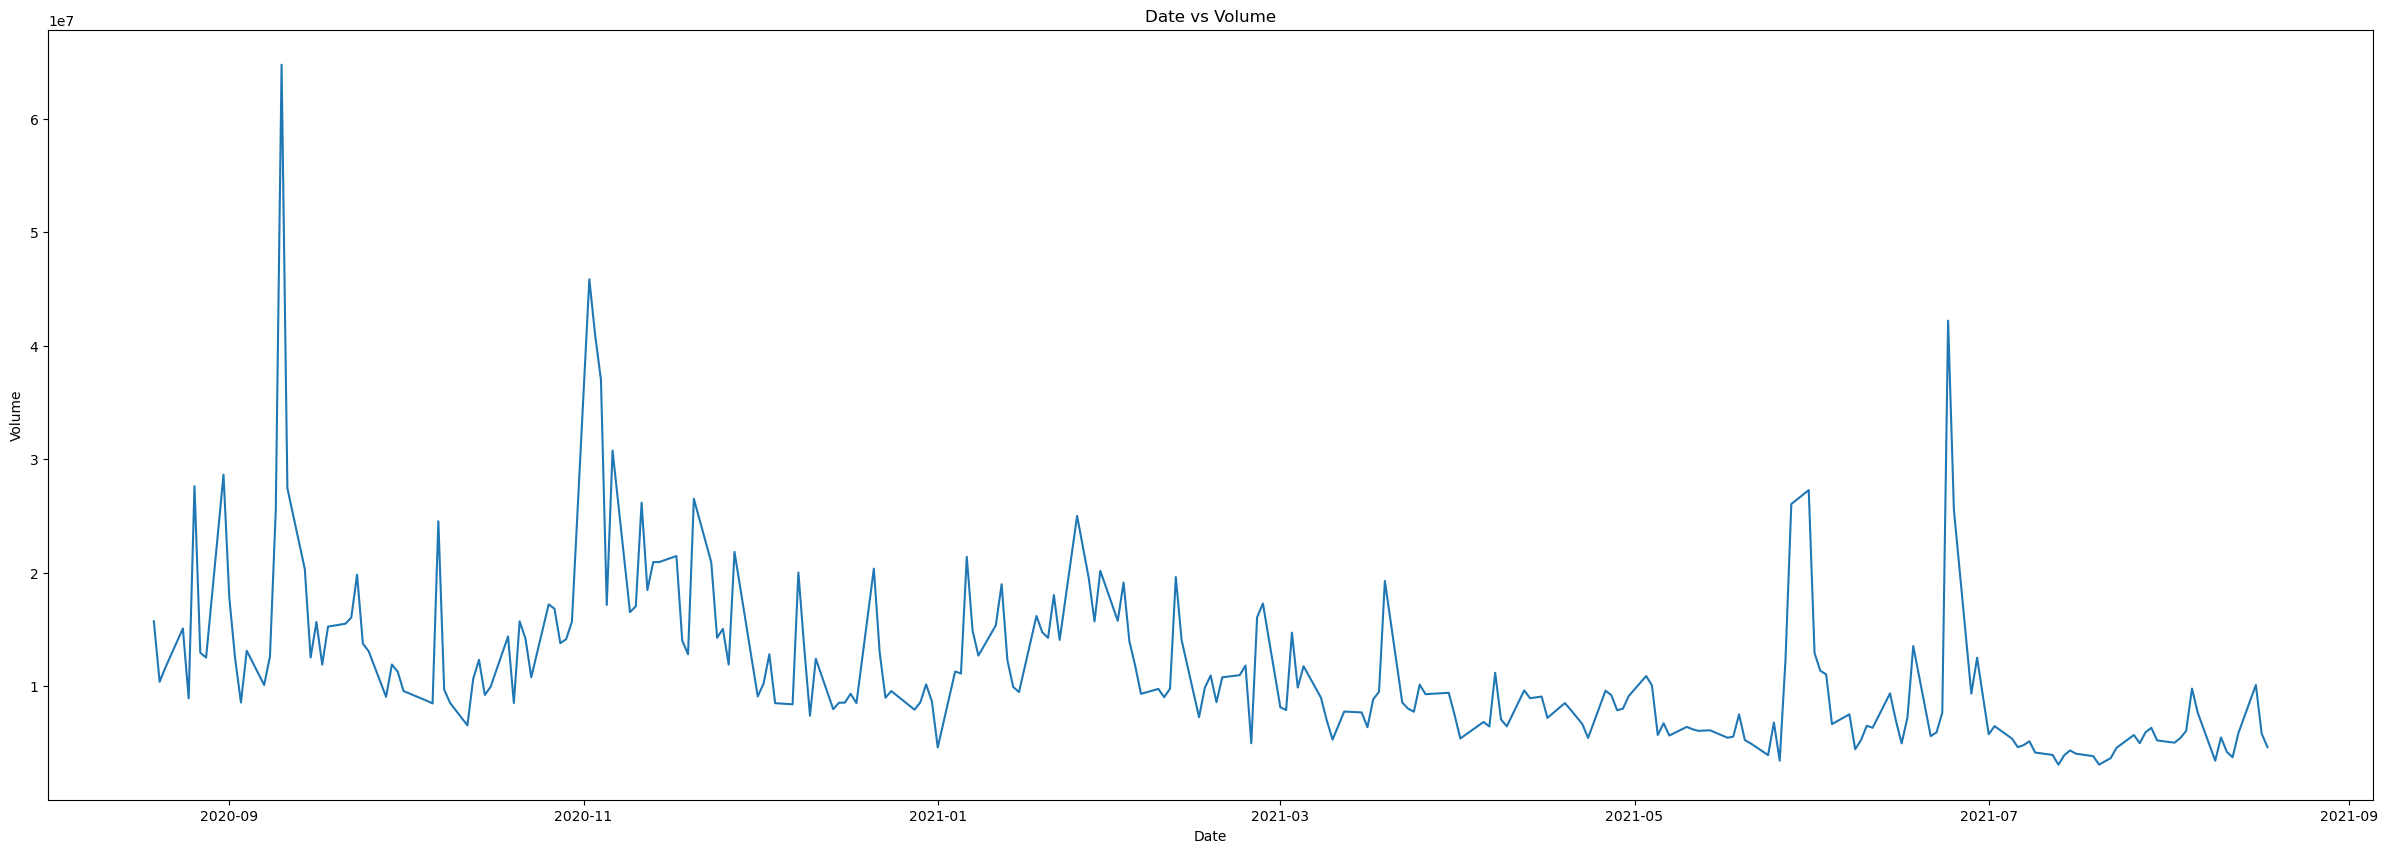

In [25]:
figure=plt.figure(figsize=(30,10))
plt.plot(df['Volume'])
plt.xlabel('Date')
plt.ylabel('Volume')
plt.title('Date vs Volume')
plt.show()


Finding long-term and short-term trends

Moving Average


In [28]:
df_ma=df.copy()
df_ma['30-day MA']=df['Close'].rolling(window=30).mean()
df_ma['200-day MA']=df['Close'].rolling(window=200).mean()

In [29]:
df_ma


Open         High          Low        Close      Volume  \
Date                                                                         
2020-08-19  2141.000000  2154.000000  2121.350098  2131.550049  15731396.0   
2020-08-20  2120.000000  2123.899902  2088.000000  2097.050049  10401212.0   
2020-08-21  2118.000000  2122.000000  2077.000000  2081.850098  11667129.0   
2020-08-24  2091.399902  2104.500000  2070.500000  2095.750000  15098991.0   
2020-08-25  2106.000000  2111.300049  2078.000000  2082.100098   8947563.0   
...                 ...          ...          ...          ...         ...   
2021-08-12  2124.899902  2126.199951  2105.000000  2110.500000   3755507.0   
2021-08-13  2117.300049  2149.899902  2108.949951  2145.649902   5898384.0   
2021-08-16  2149.350098  2203.000000  2128.149902  2173.500000  10123204.0   
2021-08-17  2168.850098  2185.199951  2147.850098  2164.250000   5841743.0   
2021-08-18  2174.000000  2186.800049  2152.600098  2172.649902   4650008.0   

              30-day MA   200-day MA  
Date                                  
2020-08-19          NaN          NaN  
2020-08-20          NaN          NaN  
2020-08-21          NaN          NaN  
2020-08-24          NaN          NaN  
2020-08-25          NaN          NaN  
...                 ...          ...  
2021-08-12  2093.253341  2030.965004  
2021-08-13  2094.843339  2031.128003  
2021-08-16  2096.325004  2031.850003  
2021-08-17  2096.793339  2032.498753  
2021-08-18  2098.388334  2033.304753  

[250 rows x 7 columns]

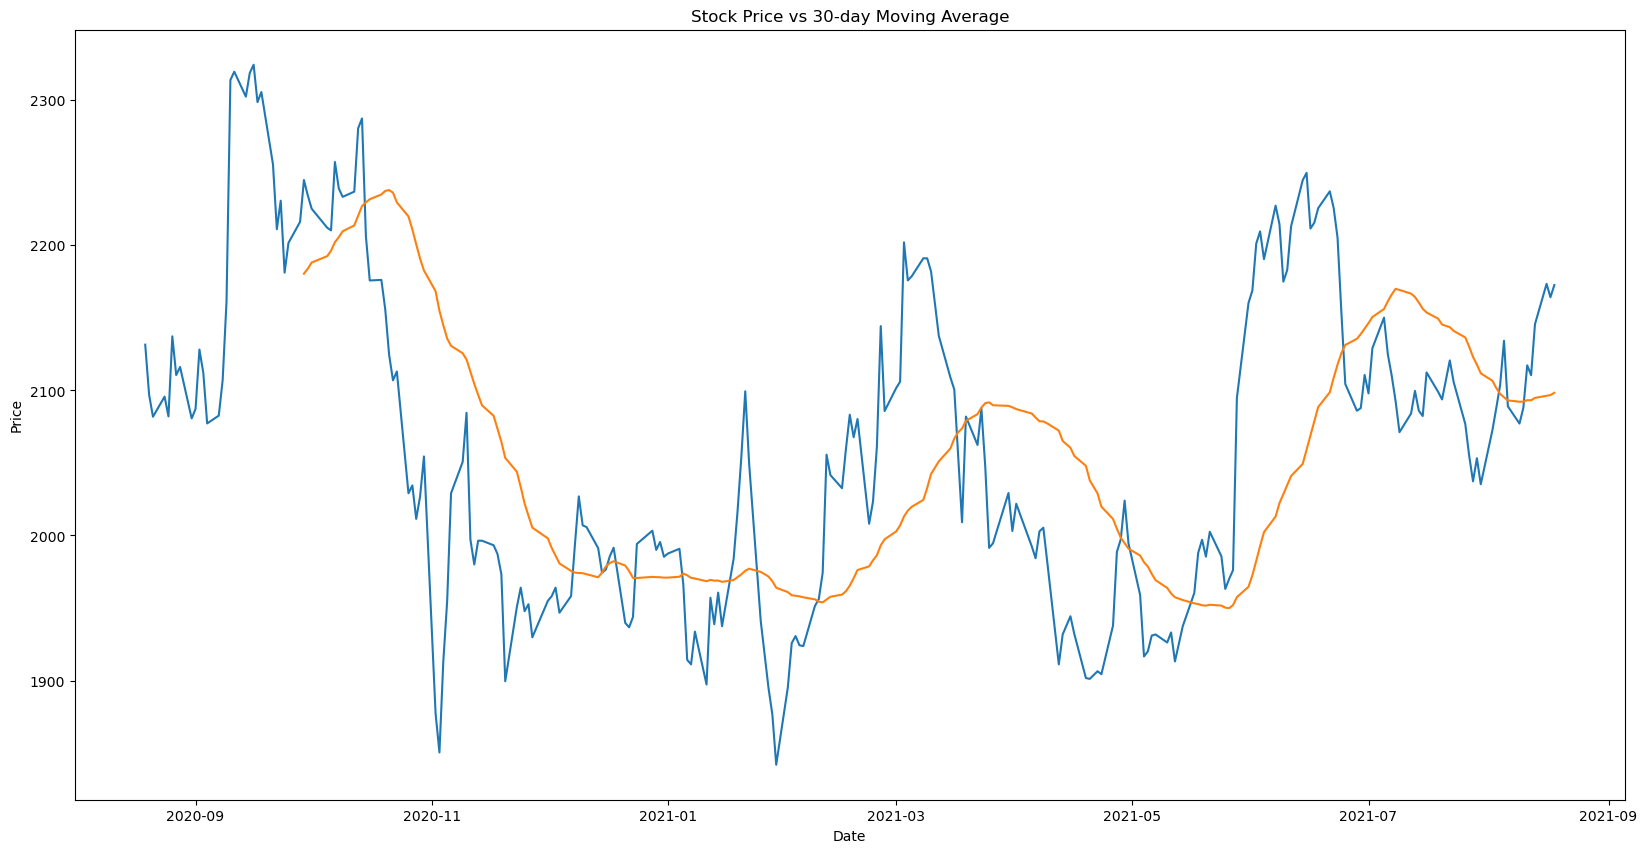

In [30]:
plt.figure(figsize=(20,10))
plt.plot(df_ma['Close'],label='Original data')
plt.plot(df_ma['30-day MA'],label='30-MA')
plt.legend
plt.title('Stock Price vs 30-day Moving Average')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

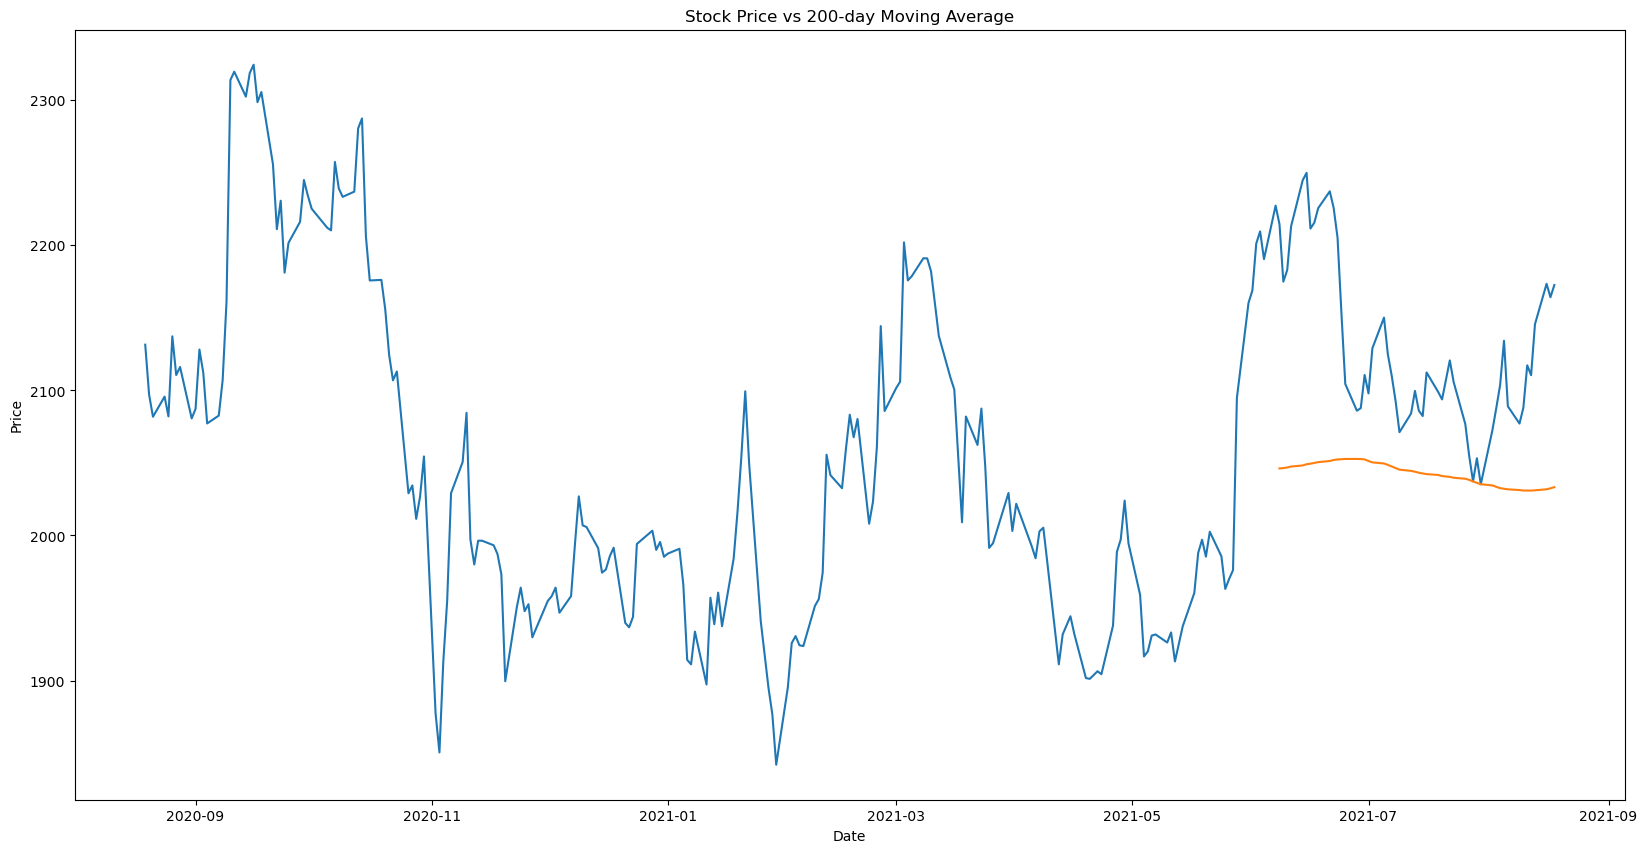

In [31]:
plt.figure(figsize=(20,10))
plt.plot(df_ma['Close'],label='Original data')
plt.plot(df_ma['200-day MA'],label='200-MA')
plt.legend
plt.title('Stock Price vs 200-day Moving Average')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

Long term and short term trends can be identified using the Moving Average graphs

In long term, Stock price is in upward tre. nd
Short term trends can be identified from MA-30 ch. art
Stock had a major short term downtrend during the year . 2020
It may be due to the bearish market during the Covid-19 out.braek

Model Building


In [34]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score, r2_score 
from sklearn.metrics import mean_poisson_deviance, mean_gamma_deviance, accuracy_score
from sklearn.preprocessing import MinMaxScaler

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM, GRU

from itertools import cycle

import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots

In [35]:
df

Open         High          Low        Close      Volume
Date                                                                      
2020-08-19  2141.000000  2154.000000  2121.350098  2131.550049  15731396.0
2020-08-20  2120.000000  2123.899902  2088.000000  2097.050049  10401212.0
2020-08-21  2118.000000  2122.000000  2077.000000  2081.850098  11667129.0
2020-08-24  2091.399902  2104.500000  2070.500000  2095.750000  15098991.0
2020-08-25  2106.000000  2111.300049  2078.000000  2082.100098   8947563.0
...                 ...          ...          ...          ...         ...
2021-08-12  2124.899902  2126.199951  2105.000000  2110.500000   3755507.0
2021-08-13  2117.300049  2149.899902  2108.949951  2145.649902   5898384.0
2021-08-16  2149.350098  2203.000000  2128.149902  2173.500000  10123204.0
2021-08-17  2168.850098  2185.199951  2147.850098  2164.250000   5841743.0
2021-08-18  2174.000000  2186.800049  2152.600098  2172.649902   4650008.0

[250 rows x 5 columns]

In [36]:
# Creating dataframe which only includes date and close time

close_df=pd.DataFrame(df['Close'])
close_df

Close
Date                   
2020-08-19  2131.550049
2020-08-20  2097.050049
2020-08-21  2081.850098
2020-08-24  2095.750000
2020-08-25  2082.100098
...                 ...
2021-08-12  2110.500000
2021-08-13  2145.649902
2021-08-16  2173.500000
2021-08-17  2164.250000
2021-08-18  2172.649902

[250 rows x 1 columns]

In [37]:
print(close_df.shape)

(250, 1)


In [38]:
close_df=close_df.reset_index()

In [39]:
close_df

Date        Close
0   2020-08-19  2131.550049
1   2020-08-20  2097.050049
2   2020-08-21  2081.850098
3   2020-08-24  2095.750000
4   2020-08-25  2082.100098
..         ...          ...
245 2021-08-12  2110.500000
246 2021-08-13  2145.649902
247 2021-08-16  2173.500000
248 2021-08-17  2164.250000
249 2021-08-18  2172.649902

[250 rows x 2 columns]

In [40]:
close_df['Date']

0     2020-08-19
1     2020-08-20
2     2020-08-21
3     2020-08-24
4     2020-08-25
         ...    
245   2021-08-12
246   2021-08-13
247   2021-08-16
248   2021-08-17
249   2021-08-18
Name: Date, Length: 250, dtype: datetime64[ns]

Normalizing / scaling close value between 0 to 1


In [42]:
close_stock = close_df.copy()
del close_df['Date']
scaler=MinMaxScaler(feature_range=(0,1))
closedf=scaler.fit_transform(np.array(close_df).reshape(-1,1))
print(closedf.shape)

(250, 1)


In [43]:
closedf

array([[0.60008297],
       [0.52859521],
       [0.49709925],
       [0.52590136],
       [0.49761728],
       [0.61199759],
       [0.55667238],
       [0.56817218],
       [0.49471602],
       [0.50828844],
       [0.5931412 ],
       [0.55978055],
       [0.48756735],
       [0.49875653],
       [0.54942   ],
       [0.66183191],
       [0.97813915],
       [0.99005378],
       [0.9544136 ],
       [0.98818908],
       [1.        ],
       [0.94653949],
       [0.96094054],
       [0.85764621],
       [0.76502254],
       [0.80573978],
       [0.70296297],
       [0.74544121],
       [0.7755905 ],
       [0.83526734],
       [0.81309587],
       [0.79423948],
       [0.76719835],
       [0.76336526],
       [0.86106499],
       [0.823249  ],
       [0.81123067],
       [0.81869046],
       [0.90913782],
       [0.92322826],
       [0.75538743],
       [0.69177379],
       [0.69260243],
       [0.65053851],
       [0.58568191],
       [0.54910888],
       [0.56174895],
       [0.387

Split data for training and testing

Ratio for training and testing data is 86:14



In [45]:
training_size=int(len(closedf)*0.86)
test_size=len(closedf)-training_size
train_data,test_data=closedf[0:training_size,:],closedf[training_size:len(closedf),:1]
print("train_data: ", train_data.shape)
print("test_data: ", test_data.shape)

train_data:  (215, 1)
test_data:  (35, 1)


In [46]:
training_size,test_size

(215, 35)

Create new dataset according to requirement of time-series prediction


In [48]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), np.array(dataY)

In [49]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 13
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

print("X_train: ", X_train.shape)
print("y_train: ", y_train.shape)
print("X_test: ", X_test.shape)
print("y_test", y_test.shape)

X_train:  (201, 13)
y_train:  (201,)
X_test:  (21, 13)
y_test (21,)


Algorithms
Support vector regression - SVR



In [51]:
import math
from sklearn.svm import SVR

svr_rbf = SVR(kernel= 'rbf', C= 1e3, gamma= 0.01)
svr_rbf.fit(X_train, y_train)

SVR(C=1000.0, gamma=0.01)

In [52]:
# Lets Do the prediction 

train_predict=svr_rbf.predict(X_train)
test_predict=svr_rbf.predict(X_test)

train_predict = train_predict.reshape(-1,1)
test_predict = test_predict.reshape(-1,1)

print("Train data prediction:", train_predict.shape)
print("Test data prediction:", test_predict.shape)

Train data prediction: (201, 1)
Test data prediction: (21, 1)


In [53]:
# Transform back to original form

train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)
original_ytrain = scaler.inverse_transform(y_train.reshape(-1,1)) 
original_ytest = scaler.inverse_transform(y_test.reshape(-1,1)) 

Evaluation metrices RMSE, MSE and MAE

Root Mean Square Error (RMSE), Mean Square Error (MSE) and Mean absolute Error (MAE) are a standard way to measure the error of a model in predicting quantitative data.

In [55]:
# Evaluation metrices RMSE and MAE
print("Train data RMSE: ", math.sqrt(mean_squared_error(original_ytrain,train_predict)))
print("Train data MSE: ", mean_squared_error(original_ytrain,train_predict))
print("Test data MAE: ", mean_absolute_error(original_ytrain,train_predict))
print("-------------------------------------------------------------------------------------")
print("Test data RMSE: ", math.sqrt(mean_squared_error(original_ytest,test_predict)))
print("Test data MSE: ", mean_squared_error(original_ytest,test_predict))
print("Test data MAE: ", mean_absolute_error(original_ytest,test_predict))

Train data RMSE:  36.34755142231141
Train data MSE:  1321.1444943975723
Test data MAE:  27.150481090317623
-------------------------------------------------------------------------------------
Test data RMSE:  24.03705245719792
Test data MSE:  577.7798908300845
Test data MAE:  21.07498697956482


Explained variance regression score
The explained variance score explains the dispersion of errors of a given dataset, and the formula is written as follows: Here, and Var(y) is the variance of prediction errors and actual values respectively. Scores close to 1.0 are highly desired, indicating better squares of standard deviations of errors.



In [57]:
print("Train data explained variance regression score:", explained_variance_score(original_ytrain, train_predict))
print("Test data explained variance regression score:", explained_variance_score(original_ytest, test_predict))

Train data explained variance regression score: 0.9067384595542299
Test data explained variance regression score: 0.5758855868607855


R2 score for regression
R-squared (R2) is a statistical measure that represents the proportion of the variance for a dependent variable that's explained by an independent variable or variables in a regression model.
1 = Best
0 or < 0 = Worse 



In [59]:
train_r2_svr=r2_score(original_ytrain, train_predict)
test_r2_svr=r2_score(original_ytest, test_predict)
print("Train data R2 score:", train_r2_svr)
print("Test data R2 score:", test_r2_svr) 

Train data R2 score: 0.9067359659011889
Test data R2 score: 0.5680861823226975


Comparision between original stock close price vs predicted close price


Train predicted data:  (250, 1)
Test predicted data:  (250, 1)


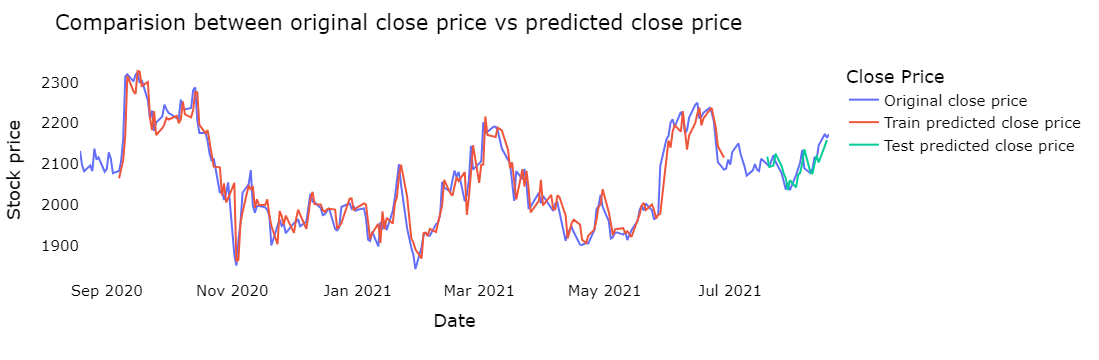

In [61]:
# shift train predictions for plotting
from itertools import cycle
import plotly.express as px

look_back=time_step
trainPredictPlot = np.empty_like(closedf)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
print("Train predicted data: ", trainPredictPlot.shape)

# shift test predictions for plotting
testPredictPlot = np.empty_like(closedf)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(closedf)-1, :] = test_predict
print("Test predicted data: ", testPredictPlot.shape)

names = cycle(['Original close price','Train predicted close price','Test predicted close price'])

plotdf = pd.DataFrame({'Date': close_stock['Date'],
                       'original_close': close_stock['Close'],
                      'train_predicted_close': trainPredictPlot.reshape(1,-1)[0].tolist(),
                      'test_predicted_close': testPredictPlot.reshape(1,-1)[0].tolist()})

fig = px.line(plotdf,x=plotdf['Date'], y=[plotdf['original_close'],plotdf['train_predicted_close'],
                                          plotdf['test_predicted_close']],
              labels={'value':'Stock price','Date': 'Date'})
fig.update_layout(title_text='Comparision between original close price vs predicted close price',
                  plot_bgcolor='white', font_size=15, font_color='black',legend_title_text='Close Price')
fig.for_each_trace(lambda t:  t.update(name = next(names)))

fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

Predicting next 30 days


In [63]:
x_input=test_data[len(test_data)-time_step:].reshape(1,-1)
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

from numpy import array

lst_output=[]
n_steps=time_step
i=0
pred_days = 30
while(i<pred_days):
    
    if(len(temp_input)>time_step):
        
        x_input=np.array(temp_input[1:])
        #print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        
        yhat = svr_rbf.predict(x_input)
        #print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat.tolist())
        temp_input=temp_input[1:]
       
        lst_output.extend(yhat.tolist())
        i=i+1
        
    else:
        yhat = svr_rbf.predict(x_input)
        
        temp_input.extend(yhat.tolist())
        lst_output.extend(yhat.tolist())
        
        i=i+1
print("Output of predicted next days: ", len(lst_output))

Output of predicted next days:  30


Plotting last 15 days and next predicted 30 days


In [65]:
last_days=np.arange(1,time_step+1)
day_pred=np.arange(time_step+1,time_step+pred_days+1)
print(last_days)
print(day_pred)

[ 1  2  3  4  5  6  7  8  9 10 11 12 13]
[14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37
 38 39 40 41 42 43]


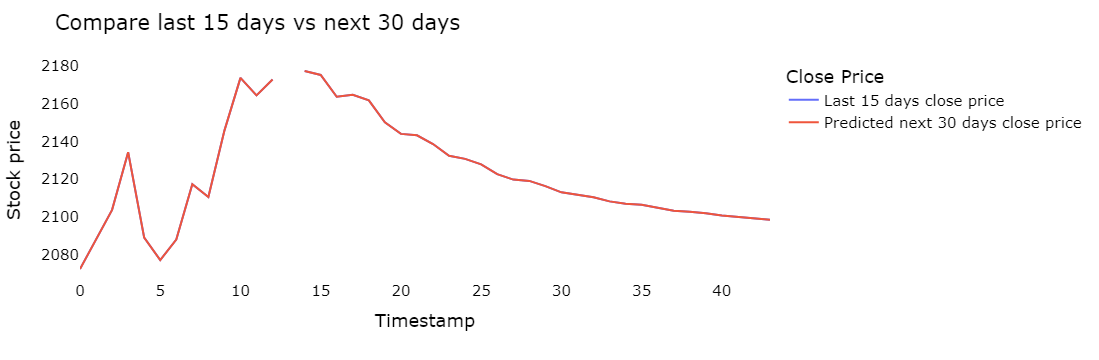

In [66]:
temp_mat = np.empty((len(last_days)+pred_days+1,1))
temp_mat[:] = np.nan
temp_mat = temp_mat.reshape(1,-1).tolist()[0]

last_original_days_value = temp_mat
next_predicted_days_value = temp_mat

last_original_days_value[0:time_step+1] = scaler.inverse_transform(closedf[len(closedf)-time_step:]).reshape(1,-1).tolist()[0]
next_predicted_days_value[time_step+1:] = scaler.inverse_transform(np.array(lst_output).reshape(-1,1)).reshape(1,-1).tolist()[0]

new_pred_plot = pd.DataFrame({
    'last_original_days_value':last_original_days_value,
    'next_predicted_days_value':next_predicted_days_value
})

names = cycle(['Last 15 days close price','Predicted next 30 days close price'])

fig = px.line(new_pred_plot,x=new_pred_plot.index, y=[new_pred_plot['last_original_days_value'],
                                                      new_pred_plot['next_predicted_days_value']],
              labels={'value': 'Stock price','index': 'Timestamp'})
fig.update_layout(title_text='Compare last 15 days vs next 30 days',
                  plot_bgcolor='white', font_size=15, font_color='black',legend_title_text='Close Price')
fig.for_each_trace(lambda t:  t.update(name = next(names)))
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

Plotting whole closing stock price with prediction


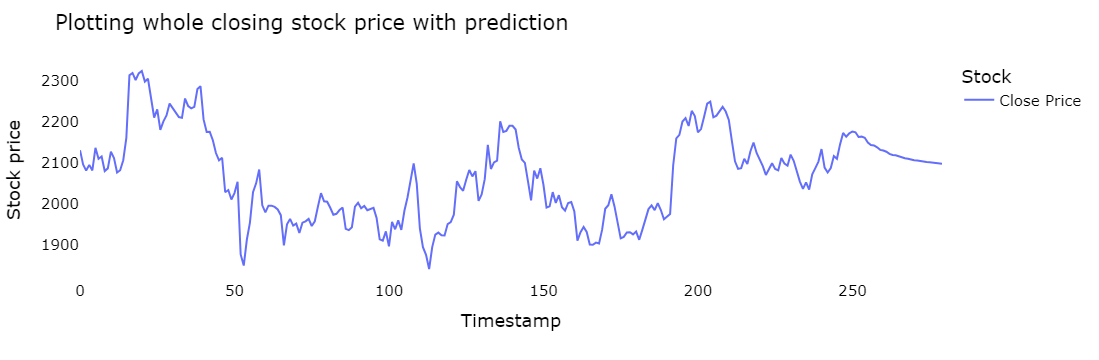

In [68]:
svrdf=closedf.tolist()
svrdf.extend((np.array(lst_output).reshape(-1,1)).tolist())
svrdf=scaler.inverse_transform(svrdf).reshape(1,-1).tolist()[0]

names = cycle(['Close Price'])

fig = px.line(svrdf,labels={'value': 'Stock price','index': 'Timestamp'})
fig.update_layout(title_text='Plotting whole closing stock price with prediction',
                  plot_bgcolor='white', font_size=15, font_color='black',legend_title_text='Stock')
fig.for_each_trace(lambda t:  t.update(name = next(names)))
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

Random Forest Regressor - RF


In [70]:
from sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor(n_estimators = 100, random_state = 0)
regressor.fit(X_train, y_train)

RandomForestRegressor(random_state=0)

In [71]:
# Lets Do the prediction 

train_predict=regressor.predict(X_train)
test_predict=regressor.predict(X_test)

train_predict = train_predict.reshape(-1,1)
test_predict = test_predict.reshape(-1,1)

print("Train data prediction:", train_predict.shape)
print("Test data prediction:", test_predict.shape)

Train data prediction: (201, 1)
Test data prediction: (21, 1)


In [72]:
# Transform back to original form

train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)
original_ytrain = scaler.inverse_transform(y_train.reshape(-1,1)) 
original_ytest = scaler.inverse_transform(y_test.reshape(-1,1)) 

Evaluation metrices RMSE, MSE and MAE

Root Mean Square Error (RMSE), Mean Square Error (MSE) and Mean absolute Error (MAE) are a standard way to measure the error of a model in predicting quantitative data.



In [74]:
# Evaluation metrices RMSE and MAE
print("Train data RMSE: ", math.sqrt(mean_squared_error(original_ytrain,train_predict)))
print("Train data MSE: ", mean_squared_error(original_ytrain,train_predict))
print("Test data MAE: ", mean_absolute_error(original_ytrain,train_predict))
print("-------------------------------------------------------------------------------------")
print("Test data RMSE: ", math.sqrt(mean_squared_error(original_ytest,test_predict)))
print("Test data MSE: ", mean_squared_error(original_ytest,test_predict))
print("Test data MAE: ", mean_absolute_error(original_ytest,test_predict))

Train data RMSE:  15.15392325842356
Train data MSE:  229.64139012219056
Test data MAE:  10.700612730547245
-------------------------------------------------------------------------------------
Test data RMSE:  29.567968568990864
Test data MSE:  874.2647652968316
Test data MAE:  24.67539009476194


Explained variance regression score

The explained variance score explains the dispersion of errors of a given dataset, and the formula is written as follows: Here, and Var(y) is the variance of prediction errors and actual values respectively. Scores close to 1.0 are highly desired, indicating better squares of standard deviations of errors.



In [76]:
print("Train data explained variance regression score:", explained_variance_score(original_ytrain, train_predict))
print("Test data explained variance regression score:", explained_variance_score(original_ytest, test_predict))

Train data explained variance regression score: 0.9838287422937024
Test data explained variance regression score: 0.3483532404577203


R2 score for regression

R-squared (R2) is a statistical measure that represents the proportion of the variance for a dependent variable that's explained by an independent variable or variables in a regression model.

1 = Best 0 or < 0 = worse




In [78]:
train_r2_rf=r2_score(original_ytrain, train_predict)
test_r2_rf=r2_score(original_ytest, test_predict)
print("Train data R2 score:", train_r2_rf)
print("Test data R2 score:", test_r2_rf)

Train data R2 score: 0.9837888417734197
Test data R2 score: 0.3464517570910869


Comparision between original stock close price vs predicted close price


Train predicted data:  (250, 1)
Test predicted data:  (250, 1)


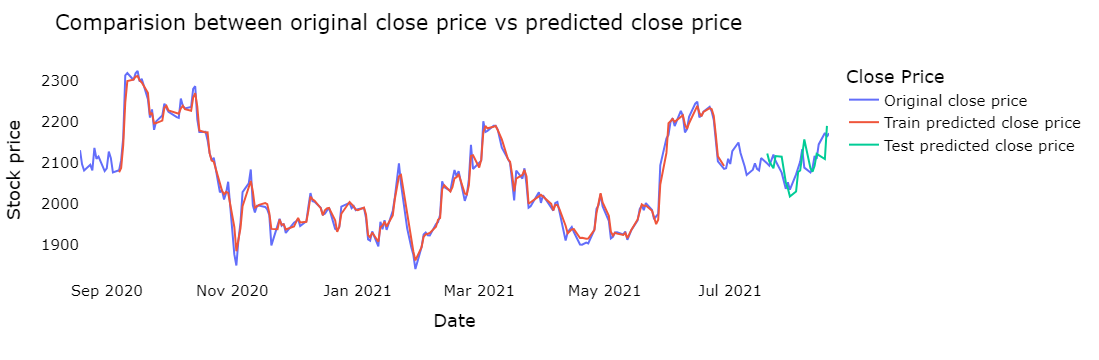

In [80]:
# shift train predictions for plotting

look_back=time_step
trainPredictPlot = np.empty_like(closedf)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
print("Train predicted data: ", trainPredictPlot.shape)

# shift test predictions for plotting
testPredictPlot = np.empty_like(closedf)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(closedf)-1, :] = test_predict
print("Test predicted data: ", testPredictPlot.shape)

names = cycle(['Original close price','Train predicted close price','Test predicted close price'])


plotdf = pd.DataFrame({'Date': close_stock['Date'],
                       'original_close': close_stock['Close'],
                      'train_predicted_close': trainPredictPlot.reshape(1,-1)[0].tolist(),
                      'test_predicted_close': testPredictPlot.reshape(1,-1)[0].tolist()})

fig = px.line(plotdf,x=plotdf['Date'], y=[plotdf['original_close'],plotdf['train_predicted_close'],
                                          plotdf['test_predicted_close']],
              labels={'value':'Stock price','Date': 'Date'})
fig.update_layout(title_text='Comparision between original close price vs predicted close price',
                  plot_bgcolor='white', font_size=15, font_color='black', legend_title_text='Close Price')
fig.for_each_trace(lambda t:  t.update(name = next(names)))

fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

Predicting next 30 days


In [82]:
x_input=test_data[len(test_data)-time_step:].reshape(1,-1)
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

from numpy import array

lst_output=[]
n_steps=time_step
i=0
pred_days = 30
while(i<pred_days):
    
    if(len(temp_input)>time_step):
        
        x_input=np.array(temp_input[1:])
        #print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        
        yhat = regressor.predict(x_input)
        #print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat.tolist())
        temp_input=temp_input[1:]
       
        lst_output.extend(yhat.tolist())
        i=i+1
        
    else:
        yhat = regressor.predict(x_input)
        
        temp_input.extend(yhat.tolist())
        lst_output.extend(yhat.tolist())
        
        i=i+1
print("Output of predicted next days: ", len(lst_output))

Output of predicted next days:  30


Plotting last 15 days and next predicted 30 days


In [84]:
last_days=np.arange(1,time_step+1)
day_pred=np.arange(time_step+1,time_step+pred_days+1)
print(last_days)
print(day_pred)

[ 1  2  3  4  5  6  7  8  9 10 11 12 13]
[14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37
 38 39 40 41 42 43]


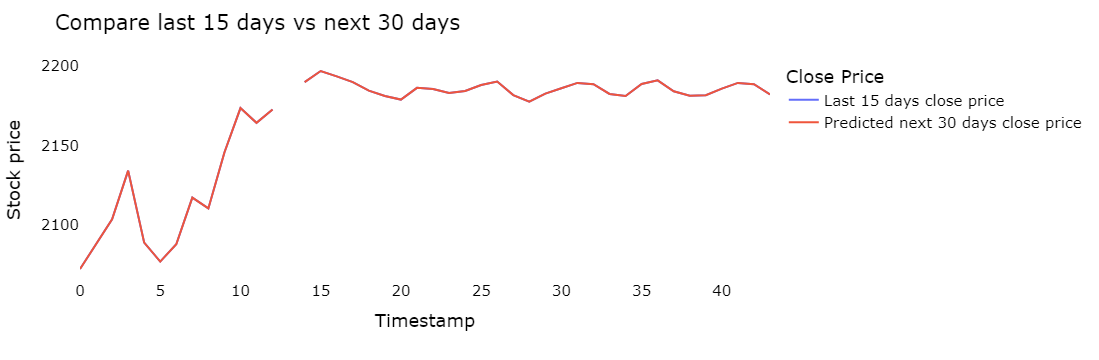

In [85]:
temp_mat = np.empty((len(last_days)+pred_days+1,1))
temp_mat[:] = np.nan
temp_mat = temp_mat.reshape(1,-1).tolist()[0]

last_original_days_value = temp_mat
next_predicted_days_value = temp_mat

last_original_days_value[0:time_step+1] = scaler.inverse_transform(closedf[len(closedf)-time_step:]).reshape(1,-1).tolist()[0]
next_predicted_days_value[time_step+1:] = scaler.inverse_transform(np.array(lst_output).reshape(-1,1)).reshape(1,-1).tolist()[0]

names = cycle(['Last 15 days close price','Predicted next 30 days close price'])

new_pred_plot = pd.DataFrame({
    'last_original_days_value':last_original_days_value,
    'next_predicted_days_value':next_predicted_days_value
})

fig = px.line(new_pred_plot,x=new_pred_plot.index, y=[new_pred_plot['last_original_days_value'],
                                                      new_pred_plot['next_predicted_days_value']],
              labels={'value': 'Stock price','index': 'Timestamp'})
fig.update_layout(title_text='Compare last 15 days vs next 30 days',
                  plot_bgcolor='white', font_size=15, font_color='black',legend_title_text='Close Price')
fig.for_each_trace(lambda t:  t.update(name = next(names)))
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

Plotting whole closing stock price with prediction


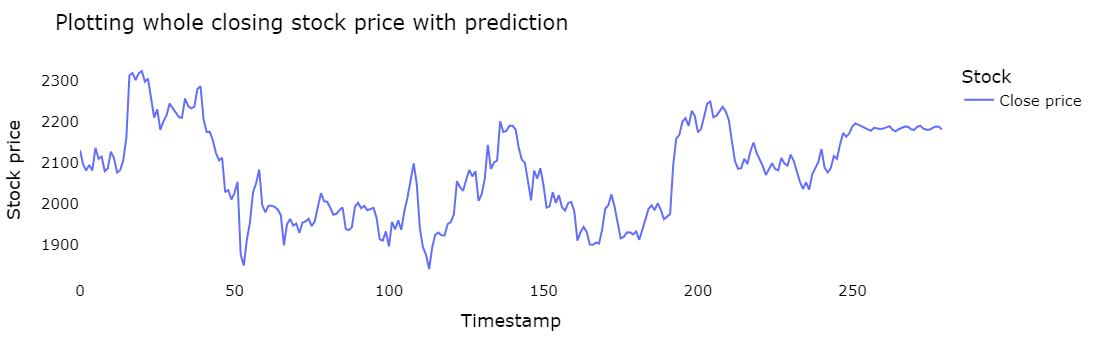

In [87]:
rfdf=closedf.tolist()
rfdf.extend((np.array(lst_output).reshape(-1,1)).tolist())
rfdf=scaler.inverse_transform(rfdf).reshape(1,-1).tolist()[0]

names = cycle(['Close price'])

fig = px.line(rfdf,labels={'value': 'Stock price','index': 'Timestamp'})
fig.update_layout(title_text='Plotting whole closing stock price with prediction',
                  plot_bgcolor='white', font_size=15, font_color='black',legend_title_text='Stock')
fig.for_each_trace(lambda t:  t.update(name = next(names)))

fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

K-nearest neighgbour - KNN

In [89]:
from sklearn import neighbors

K = time_step
neighbor = neighbors.KNeighborsRegressor(n_neighbors = K)
neighbor.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=13)

In [90]:
# Lets Do the prediction 

train_predict=neighbor.predict(X_train)
test_predict=neighbor.predict(X_test)

train_predict = train_predict.reshape(-1,1)
test_predict = test_predict.reshape(-1,1)

print("Train data prediction:", train_predict.shape)
print("Test data prediction:", test_predict.shape)

Train data prediction: (201, 1)
Test data prediction: (21, 1)


In [91]:
# Transform back to original form

train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)
original_ytrain = scaler.inverse_transform(y_train.reshape(-1,1)) 
original_ytest = scaler.inverse_transform(y_test.reshape(-1,1)) 

Evaluation metrices RMSE, MSE and MAE
Root Mean Square Error (RMSE), Mean Square Error (MSE) and Mean absolute Error (MAE) are a standard way to measure the error of a model in predicting quantitative data.



In [93]:
# Evaluation metrices RMSE and MAE
print("Train data RMSE: ", math.sqrt(mean_squared_error(original_ytrain,train_predict)))
print("Train data MSE: ", mean_squared_error(original_ytrain,train_predict))
print("Test data MAE: ", mean_absolute_error(original_ytrain,train_predict))
print("-------------------------------------------------------------------------------------")
print("Test data RMSE: ", math.sqrt(mean_squared_error(original_ytest,test_predict)))
print("Test data MSE: ", mean_squared_error(original_ytest,test_predict))
print("Test data MAE: ", mean_absolute_error(original_ytest,test_predict))

Train data RMSE:  47.02583674225699
Train data MSE:  2211.429321309408
Test data MAE:  34.941960732491374
-------------------------------------------------------------------------------------
Test data RMSE:  40.87243378301336
Test data MSE:  1670.5558433468123
Test data MAE:  32.51063176923073


Explained variance regression score
The explained variance score explains the dispersion of errors of a given dataset, and the formula is written as follows: Here, and Var(y) is the variance of prediction errors and actual values respectively. Scores close to 1.0 are highly desired, indicating better squares of standard deviations of errors.



In [95]:
print("Train data explained variance regression score:", explained_variance_score(original_ytrain, train_predict))
print("Test data explained variance regression score:", explained_variance_score(original_ytest, test_predict))

Train data explained variance regression score: 0.8453873536602011
Test data explained variance regression score: 0.16698731210470097


R2 score for regression
R-squared (R2) is a statistical measure that represents the proportion of the variance for a dependent variable that's explained by an independent variable or variables in a regression model.

1 = Best 0 or < 0 = worse




In [97]:
train_r2_knn=r2_score(original_ytrain, train_predict)
test_r2_knn=r2_score(original_ytest, test_predict)
print("Train data R2 score:", train_r2_knn)
print("Test data R2 score:", test_r2_knn)

Train data R2 score: 0.8438877651125074
Test data R2 score: -0.24880800352264099


Comparision between original stock close price vs predicted close price


Train predicted data:  (250, 1)
Test predicted data:  (250, 1)


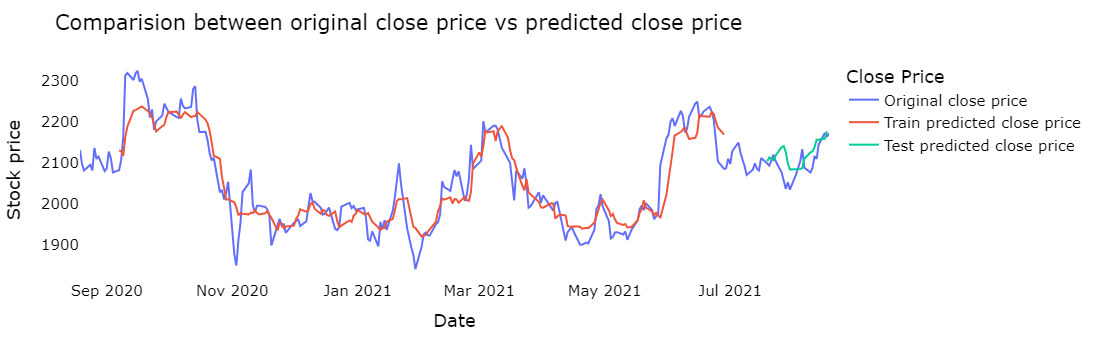

In [99]:
# shift train predictions for plotting

look_back=time_step
trainPredictPlot = np.empty_like(closedf)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
print("Train predicted data: ", trainPredictPlot.shape)

# shift test predictions for plotting
testPredictPlot = np.empty_like(closedf)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(closedf)-1, :] = test_predict
print("Test predicted data: ", testPredictPlot.shape)

names = cycle(['Original close price','Train predicted close price','Test predicted close price'])

plotdf = pd.DataFrame({'Date': close_stock['Date'],
                       'original_close': close_stock['Close'],
                      'train_predicted_close': trainPredictPlot.reshape(1,-1)[0].tolist(),
                      'test_predicted_close': testPredictPlot.reshape(1,-1)[0].tolist()})

fig = px.line(plotdf,x=plotdf['Date'], y=[plotdf['original_close'],plotdf['train_predicted_close'],
                                          plotdf['test_predicted_close']],
              labels={'value':'Stock price','Date': 'Date'})
fig.update_layout(title_text='Comparision between original close price vs predicted close price',
                  plot_bgcolor='white', font_size=15, font_color='black',legend_title_text='Close Price')
fig.for_each_trace(lambda t:  t.update(name = next(names)))

fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

Predicting next 30 days


In [101]:
x_input=test_data[len(test_data)-time_step:].reshape(1,-1)
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

from numpy import array

lst_output=[]
n_steps=time_step
i=0
pred_days = 30
while(i<pred_days):
    
    if(len(temp_input)>time_step):
        
        x_input=np.array(temp_input[1:])
        #print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        
        yhat = neighbor.predict(x_input)
        #print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat.tolist())
        temp_input=temp_input[1:]
       
        lst_output.extend(yhat.tolist())
        i=i+1
        
    else:
        yhat = neighbor.predict(x_input)
        
        temp_input.extend(yhat.tolist())
        lst_output.extend(yhat.tolist())
        
        i=i+1
print("Output of predicted next days: ", len(lst_output))

Output of predicted next days:  30


Plotting last 15 days and next predicted 30 days


In [103]:
last_days=np.arange(1,time_step+1)
day_pred=np.arange(time_step+1,time_step+pred_days+1)
print(last_days)
print(day_pred)

[ 1  2  3  4  5  6  7  8  9 10 11 12 13]
[14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37
 38 39 40 41 42 43]


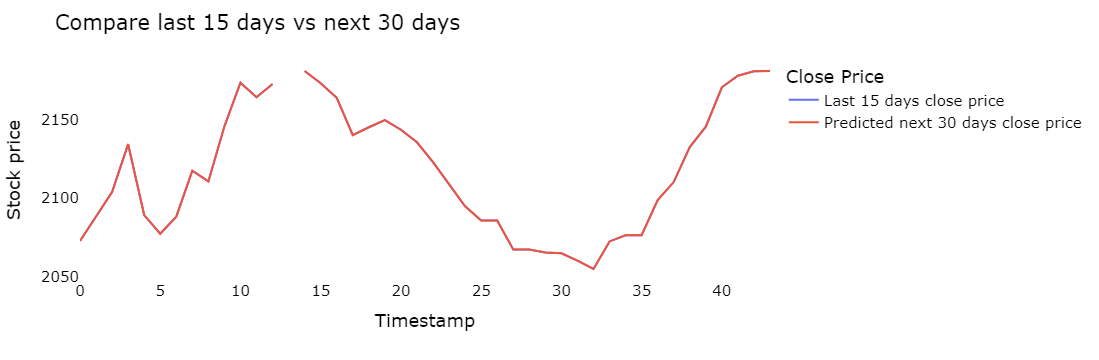

In [104]:
temp_mat = np.empty((len(last_days)+pred_days+1,1))
temp_mat[:] = np.nan
temp_mat = temp_mat.reshape(1,-1).tolist()[0]

last_original_days_value = temp_mat
next_predicted_days_value = temp_mat

last_original_days_value[0:time_step+1] = scaler.inverse_transform(closedf[len(closedf)-time_step:]).reshape(1,-1).tolist()[0]
next_predicted_days_value[time_step+1:] = scaler.inverse_transform(np.array(lst_output).reshape(-1,1)).reshape(1,-1).tolist()[0]

new_pred_plot = pd.DataFrame({
    'last_original_days_value':last_original_days_value,
    'next_predicted_days_value':next_predicted_days_value
})

names = cycle(['Last 15 days close price','Predicted next 30 days close price'])

fig = px.line(new_pred_plot,x=new_pred_plot.index, y=[new_pred_plot['last_original_days_value'],
                                                      new_pred_plot['next_predicted_days_value']],
              labels={'value': 'Stock price','index': 'Timestamp'})
fig.update_layout(title_text='Compare last 15 days vs next 30 days',
                  plot_bgcolor='white', font_size=15, font_color='black',legend_title_text='Close Price')
fig.for_each_trace(lambda t:  t.update(name = next(names)))

fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

Plotting whole closing stock price with prediction


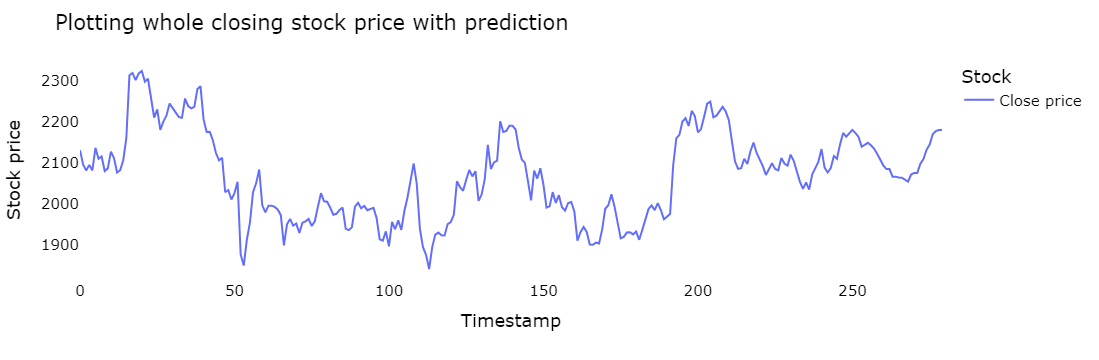

In [106]:
knndf=closedf.tolist()
knndf.extend((np.array(lst_output).reshape(-1,1)).tolist())
knndf=scaler.inverse_transform(knndf).reshape(1,-1).tolist()[0]

names = cycle(['Close price'])

fig = px.line(knndf,labels={'value': 'Stock price','index': 'Timestamp'})
fig.update_layout(title_text='Plotting whole closing stock price with prediction',
                  plot_bgcolor='white', font_size=15, font_color='black',legend_title_text='Stock')
fig.for_each_trace(lambda t:  t.update(name = next(names)))

fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

LSTM

In [108]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

print("X_train: ", X_train.shape)
print("X_test: ", X_test.shape)

X_train:  (201, 13, 1)
X_test:  (21, 13, 1)


LSTM model structure


In [110]:
tf.keras.backend.clear_session()
LSTM_model=Sequential()
LSTM_model.add(LSTM(32,return_sequences=True,input_shape=(time_step,1)))
LSTM_model.add(LSTM(32,return_sequences=True))
LSTM_model.add(LSTM(32))
LSTM_model.add(Dense(1))
LSTM_model.compile(loss='mean_squared_error',optimizer='adam')

In [111]:
LSTM_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 13, 32)              │           4,352 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 13, 32)              │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ (None, 32)                  │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 21,025 (82.13 KB)

 Trainable params: 21,025 (82.13 KB)

 Non-trainable params: 0 (0.00 B)

In [112]:
LSTM_model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=100,batch_size=32,verbose=1)

Epoch 1/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 18s 328ms/step - loss: 0.2062 - val_loss: 0.0942
Epoch 2/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0677 - val_loss: 0.0224
Epoch 3/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0525 - val_loss: 0.0092
Epoch 4/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0411 - val_loss: 0.0216
Epoch 5/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0384 - val_loss: 0.0073
Epoch 6/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0309 - val_loss: 0.0071
Epoch 7/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0343 - val_loss: 0.0090
Epoch 8/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.0308 - val_loss: 0.0079
Epoch 9/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 0.0311 - val_loss: 0.0067
Epoch 10/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 0.0286 - val_loss: 0.0079
Epoch 11/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0345 - val_loss: 0.0079
Epoch 12/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0335 - val_

In [113]:
### Lets Do the prediction and check performance metrics
train_predict=LSTM_model.predict(X_train)
test_predict=LSTM_model.predict(X_test)
train_predict.shape, test_predict.shape

7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 280ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


((201, 1), (21, 1))

In [114]:
# Transform back to original form

train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)
original_ytrain = scaler.inverse_transform(y_train.reshape(-1,1)) 
original_ytest = scaler.inverse_transform(y_test.reshape(-1,1)) 

Evaluation metrices RMSE, MSE and MAE

Root Mean Square Error (RMSE), Mean Square Error (MSE) and Mean absolute Error (MAE) are a standard way to measure the error of a model in predicting quantitative data.




In [116]:
# Evaluation metrices RMSE and MAE
print("Train data RMSE: ", math.sqrt(mean_squared_error(original_ytrain,train_predict)))
print("Train data MSE: ", mean_squared_error(original_ytrain,train_predict))
print("Test data MAE: ", mean_absolute_error(original_ytrain,train_predict))
print("-------------------------------------------------------------------------------------")
print("Test data RMSE: ", math.sqrt(mean_squared_error(original_ytest,test_predict)))
print("Test data MSE: ", mean_squared_error(original_ytest,test_predict))
print("Test data MAE: ", mean_absolute_error(original_ytest,test_predict))

Train data RMSE:  45.15838556924876
Train data MSE:  2039.2797872209342
Test data MAE:  34.326665622745644
-------------------------------------------------------------------------------------
Test data RMSE:  39.409690533698054
Test data MSE:  1553.1237079618502
Test data MAE:  33.59086097321431


Explained variance regression score

The explained variance score explains the dispersion of errors of a given dataset, and the formula is written as follows: Here, and Var(y) is the variance of prediction errors and actual values respectively. Scores close to 1.0 are highly desired, indicating better squares of standard deviations of errors.



In [118]:
print("Train data explained variance regression score:", explained_variance_score(original_ytrain, train_predict))
print("Test data explained variance regression score:", explained_variance_score(original_ytest, test_predict))

Train data explained variance regression score: 0.8891326054799302
Test data explained variance regression score: 0.6020107984699048


R2 score for regression

R-squared (R2) is a statistical measure that represents the proportion of the variance for a dependent variable that's explained by an independent variable or variables in a regression model.

1 = Best 0 or < 0 = worse





In [120]:
train_r2_lstm=r2_score(original_ytrain, train_predict)
test_r2_lstm=r2_score(original_ytest, test_predict)
print("Train data R2 score:", train_r2_lstm)
print("Test data R2 score:", test_r2_lstm)

Train data R2 score: 0.8560403798230148
Test data R2 score: -0.1610227366466208


Train predicted data:  (250, 1)
Test predicted data:  (250, 1)


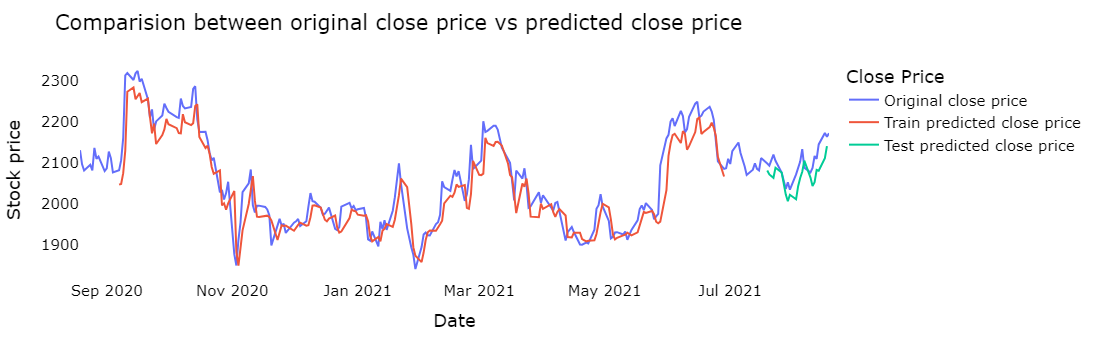

In [121]:
# shift train predictions for plotting

look_back=time_step
trainPredictPlot = np.empty_like(closedf)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
print("Train predicted data: ", trainPredictPlot.shape)

# shift test predictions for plotting
testPredictPlot = np.empty_like(closedf)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(closedf)-1, :] = test_predict
print("Test predicted data: ", testPredictPlot.shape)

names = cycle(['Original close price','Train predicted close price','Test predicted close price'])


plotdf = pd.DataFrame({'Date': close_stock['Date'],
                       'original_close': close_stock['Close'],
                      'train_predicted_close': trainPredictPlot.reshape(1,-1)[0].tolist(),
                      'test_predicted_close': testPredictPlot.reshape(1,-1)[0].tolist()})

fig = px.line(plotdf,x=plotdf['Date'], y=[plotdf['original_close'],plotdf['train_predicted_close'],
                                          plotdf['test_predicted_close']],
              labels={'value':'Stock price','Date': 'Date'})
fig.update_layout(title_text='Comparision between original close price vs predicted close price',
                  plot_bgcolor='white', font_size=15, font_color='black', legend_title_text='Close Price')
fig.for_each_trace(lambda t:  t.update(name = next(names)))

fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

Predicting next 30 days


In [123]:
x_input=test_data[len(test_data)-time_step:].reshape(1,-1)
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

from numpy import array

lst_output=[]
n_steps=time_step
i=0
pred_days = 30
while(i<pred_days):
    
    if(len(temp_input)>time_step):
        
        x_input=np.array(temp_input[1:])
        #print("{} day input {}".format(i,x_input))
        x_input = x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        
        yhat = LSTM_model.predict(x_input, verbose=0)
        #print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
       
        lst_output.extend(yhat.tolist())
        i=i+1
        
    else:
        
        x_input = x_input.reshape((1, n_steps,1))
        yhat = LSTM_model.predict(x_input, verbose=0)
        temp_input.extend(yhat[0].tolist())
        
        lst_output.extend(yhat.tolist())
        i=i+1
               
print("Output of predicted next days: ", len(lst_output))

Output of predicted next days:  30


Plotting last 15 days and next predicted 30 days


In [125]:
last_days=np.arange(1,time_step+1)
day_pred=np.arange(time_step+1,time_step+pred_days+1)
print(last_days)
print(day_pred)

[ 1  2  3  4  5  6  7  8  9 10 11 12 13]
[14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37
 38 39 40 41 42 43]


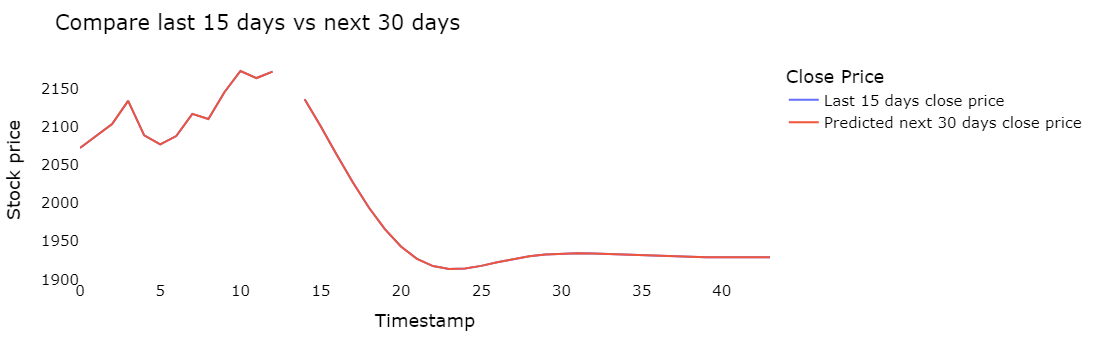

In [126]:
temp_mat = np.empty((len(last_days)+pred_days+1,1))
temp_mat[:] = np.nan
temp_mat = temp_mat.reshape(1,-1).tolist()[0]

last_original_days_value = temp_mat
next_predicted_days_value = temp_mat

last_original_days_value[0:time_step+1] = scaler.inverse_transform(closedf[len(closedf)-time_step:]).reshape(1,-1).tolist()[0]
next_predicted_days_value[time_step+1:] = scaler.inverse_transform(np.array(lst_output).reshape(-1,1)).reshape(1,-1).tolist()[0]

new_pred_plot = pd.DataFrame({
    'last_original_days_value':last_original_days_value,
    'next_predicted_days_value':next_predicted_days_value
})

names = cycle(['Last 15 days close price','Predicted next 30 days close price'])

fig = px.line(new_pred_plot,x=new_pred_plot.index, y=[new_pred_plot['last_original_days_value'],
                                                      new_pred_plot['next_predicted_days_value']],
              labels={'value': 'Stock price','index': 'Timestamp'})
fig.update_layout(title_text='Compare last 15 days vs next 30 days',
                  plot_bgcolor='white', font_size=15, font_color='black',legend_title_text='Close Price')

fig.for_each_trace(lambda t:  t.update(name = next(names)))
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

Plotting whole closing stock price with prediction


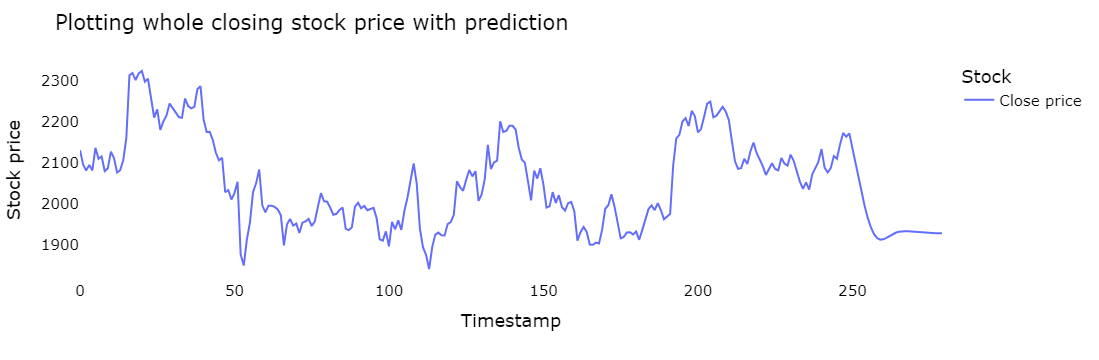

In [128]:
lstmdf=closedf.tolist()
lstmdf.extend((np.array(lst_output).reshape(-1,1)).tolist())
lstmdf=scaler.inverse_transform(lstmdf).reshape(1,-1).tolist()[0]

names = cycle(['Close price'])

fig = px.line(lstmdf,labels={'value': 'Stock price','index': 'Timestamp'})
fig.update_layout(title_text='Plotting whole closing stock price with prediction',
                  plot_bgcolor='white', font_size=15, font_color='black',legend_title_text='Stock')

fig.for_each_trace(lambda t:  t.update(name = next(names)))

fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

GRU (Gated Recurrent Unit)


In [130]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

print("X_train: ", X_train.shape)
print("X_test: ", X_test.shape)

X_train:  (201, 13, 1)
X_test:  (21, 13, 1)


In [131]:
tf.keras.backend.clear_session()
model=Sequential()
model.add(GRU(32,return_sequences=True,input_shape=(time_step,1)))
model.add(GRU(32,return_sequences=True))
model.add(GRU(32,return_sequences=True))
model.add(GRU(32))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [132]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ gru (GRU)                            │ (None, 13, 32)              │           3,360 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ gru_1 (GRU)                          │ (None, 13, 32)              │           6,336 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ gru_2 (GRU)                          │ (None, 13, 32)              │           6,336 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ gru_3 (GRU)                          │ (None, 32)                  │           6,336 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 22,401 (87.50 KB)

 Trainable params: 22,401 (87.50 KB)

 Non-trainable params: 0 (0.00 B)

In [133]:
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=100,batch_size=32,verbose=1)


Epoch 1/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 31s 720ms/step - loss: 0.1699 - val_loss: 0.0059
Epoch 2/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step - loss: 0.0395 - val_loss: 0.0059
Epoch 3/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 65ms/step - loss: 0.0262 - val_loss: 0.0212
Epoch 4/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - loss: 0.0336 - val_loss: 0.0059
Epoch 5/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 60ms/step - loss: 0.0237 - val_loss: 0.0059
Epoch 6/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 62ms/step - loss: 0.0225 - val_loss: 0.0092
Epoch 7/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 67ms/step - loss: 0.0228 - val_loss: 0.0063
Epoch 8/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 62ms/step - loss: 0.0207 - val_loss: 0.0060
Epoch 9/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 0.0197 - val_loss: 0.0060
Epoch 10/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - loss: 0.0191 - val_loss: 0.0055
Epoch 11/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 0.0185 - val_loss: 0.0059
Epoch 12/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - loss: 0.0185 - val_

Evaluation metrices RMSE, MSE and MAE

Root Mean Square Error (RMSE), Mean Square Error (MSE) and Mean absolute Error (MAE) are a standard way to measure the error of a model in predicting quantitative data.




In [135]:
# Evaluation metrices RMSE and MAE
print("Train data RMSE: ", math.sqrt(mean_squared_error(original_ytrain,train_predict)))
print("Train data MSE: ", mean_squared_error(original_ytrain,train_predict))
print("Test data MAE: ", mean_absolute_error(original_ytrain,train_predict))
print("-------------------------------------------------------------------------------------")
print("Test data RMSE: ", math.sqrt(mean_squared_error(original_ytest,test_predict)))
print("Test data MSE: ", mean_squared_error(original_ytest,test_predict))
print("Test data MAE: ", mean_absolute_error(original_ytest,test_predict))

Train data RMSE:  45.15838556924876
Train data MSE:  2039.2797872209342
Test data MAE:  34.326665622745644
-------------------------------------------------------------------------------------
Test data RMSE:  39.409690533698054
Test data MSE:  1553.1237079618502
Test data MAE:  33.59086097321431


Explained variance regression score

The explained variance score explains the dispersion of errors of a given dataset, and the formula is written as follows: Here, and Var(y) is the variance of prediction errors and actual values respectively. Scores close to 1.0 are highly desired, indicating better squares of standard deviations of errors.




In [137]:
print("Train data explained variance regression score:", explained_variance_score(original_ytrain, train_predict))
print("Test data explained variance regression score:", explained_variance_score(original_ytest, test_predict))

Train data explained variance regression score: 0.8891326054799302
Test data explained variance regression score: 0.6020107984699048


R2 score for regression

R-squared (R2) is a statistical measure that represents the proportion of the variance for a dependent variable that's explained by an independent variable or variables in a regression model.

1 = Best 0 or < 0 = worse





In [139]:
train_r2_gru=r2_score(original_ytrain, train_predict)
test_r2_gru=r2_score(original_ytest, test_predict)
print("Train data R2 score:", train_r2_gru)
print("Test data R2 score:", test_r2_gru)

Train data R2 score: 0.8560403798230148
Test data R2 score: -0.1610227366466208


Comparision between original stock close price vs predicted close price


In [141]:
# shift train predictions for plotting

look_back=time_step
trainPredictPlot = np.empty_like(closedf)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
print("Train predicted data: ", trainPredictPlot.shape)

# shift test predictions for plotting
testPredictPlot = np.empty_like(closedf)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(closedf)-1, :] = test_predict
print("Test predicted data: ", testPredictPlot.shape)

names = cycle(['Original close price','Train predicted close price','Test predicted close price'])

plotdf = pd.DataFrame({'Date': close_stock['Date'],
                       'original_close': close_stock['Close'],
                      'train_predicted_close': trainPredictPlot.reshape(1,-1)[0].tolist(),
                      'test_predicted_close': testPredictPlot.reshape(1,-1)[0].tolist()})

fig = px.line(plotdf,x=plotdf['Date'], y=[plotdf['original_close'],plotdf['train_predicted_close'],
                                          plotdf['test_predicted_close']],
              labels={'value':'Stock price','Date': 'Date'})
fig.update_layout(title_text='Comparision between original close price vs predicted close price',
                  plot_bgcolor='white', font_size=15, font_color='black',legend_title_text='Close Price')
fig.for_each_trace(lambda t:  t.update(name = next(names)))

fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

Train predicted data:  (250, 1)
Test predicted data:  (250, 1)


In [142]:
plotdf.head(100)

Date  original_close  train_predicted_close  test_predicted_close
0  2020-08-19     2131.550049                    NaN                   NaN
1  2020-08-20     2097.050049                    NaN                   NaN
2  2020-08-21     2081.850098                    NaN                   NaN
3  2020-08-24     2095.750000                    NaN                   NaN
4  2020-08-25     2082.100098                    NaN                   NaN
..        ...             ...                    ...                   ...
95 2021-01-04     1990.849976            1971.610352                   NaN
96 2021-01-05     1966.099976            1972.887939                   NaN
97 2021-01-06     1914.250000            1958.315308                   NaN
98 2021-01-07     1911.150024            1922.446167                   NaN
99 2021-01-08     1933.699951            1909.224854                   NaN

[100 rows x 4 columns]

Predicting next 30 days


In [144]:
x_input=test_data[len(test_data)-time_step:].reshape(1,-1)
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

from numpy import array

lst_output=[]
n_steps=time_step
i=0
pred_days = 30
while(i<pred_days):
    
    if(len(temp_input)>time_step):
        
        x_input=np.array(temp_input[1:])
        #print("{} day input {}".format(i,x_input))
        x_input = x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        
        yhat = model.predict(x_input, verbose=0)
        #print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
       
        lst_output.extend(yhat.tolist())
        i=i+1
        
    else:
        
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        temp_input.extend(yhat[0].tolist())

        lst_output.extend(yhat.tolist())
        i=i+1
               
print("Output of predicted next days: ", len(lst_output))

Output of predicted next days:  30


Plotting last 15 days and next predicted 30 days


In [146]:
last_days=np.arange(1,time_step+1)
day_pred=np.arange(time_step+1,time_step+pred_days+1)
print(last_days)
print(day_pred)

[ 1  2  3  4  5  6  7  8  9 10 11 12 13]
[14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37
 38 39 40 41 42 43]


In [147]:
temp_mat = np.empty((len(last_days)+pred_days+1,1))
temp_mat[:] = np.nan
temp_mat = temp_mat.reshape(1,-1).tolist()[0]

last_original_days_value = temp_mat
next_predicted_days_value = temp_mat

last_original_days_value[0:time_step+1] = scaler.inverse_transform(closedf[len(closedf)-time_step:]).reshape(1,-1).tolist()[0]
next_predicted_days_value[time_step+1:] = scaler.inverse_transform(np.array(lst_output).reshape(-1,1)).reshape(1,-1).tolist()[0]

new_pred_plot = pd.DataFrame({
    'last_original_days_value':last_original_days_value,
    'next_predicted_days_value':next_predicted_days_value
})
names = cycle(['Last 15 days close price','Predicted next 30 days close price'])

fig = px.line(new_pred_plot,x=new_pred_plot.index, y=[new_pred_plot['last_original_days_value'],
                                                      new_pred_plot['next_predicted_days_value']],
              labels={'value': 'Stock price','index': 'Timestamp'})
fig.update_layout(title_text='Compare last 15 days vs next 30 days',
                  plot_bgcolor='white', font_size=15, font_color='black', legend_title_text='Close Price')
fig.for_each_trace(lambda t:  t.update(name = next(names)))

fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

Plotting whole closing stock price with prediction


In [149]:
grudf=closedf.tolist()
grudf.extend((np.array(lst_output).reshape(-1,1)).tolist())
grudf=scaler.inverse_transform(grudf).reshape(1,-1).tolist()[0]

names = cycle(['Close price'])
fig = px.line(grudf,labels={'value': 'Stock price','index': 'Timestamp'})
fig.update_layout(title_text='Plotting whole closing stock price with prediction',
                  plot_bgcolor='white', font_size=15, font_color='black',legend_title_text='Stock')
fig.for_each_trace(lambda t:  t.update(name = next(names)))

fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

In [150]:
finaldf = pd.DataFrame({
    'svr':svrdf,
    'rf':rfdf,
    'knn':knndf,
    'lstm':lstmdf,
    'gru':grudf,
})
finaldf

svr           rf          knn         lstm          gru
0    2131.550049  2131.550049  2131.550049  2131.550049  2131.550049
1    2097.050049  2097.050049  2097.050049  2097.050049  2097.050049
2    2081.850098  2081.850098  2081.850098  2081.850098  2081.850098
3    2095.750000  2095.750000  2095.750000  2095.750000  2095.750000
4    2082.100098  2082.100098  2082.100098  2082.100098  2082.100098
..           ...          ...          ...          ...          ...
275  2101.993114  2181.597493  2145.384644  1929.075751  2290.838319
276  2100.804690  2185.742500  2170.550030  1928.914846  2294.921799
277  2100.019187  2189.290498  2177.946176  1928.868966  2298.956350
278  2099.443120  2188.474998  2180.707726  1928.898155  2302.937425
279  2098.505513  2181.998003  2180.930796  1928.967659  2306.860309

[280 rows x 5 columns]

Conclusion Chart


In [152]:
names = cycle(['SVR', 'RF','KNN','LSTM','GRU'])

fig = px.line(finaldf[225:], x=finaldf.index[225:], y=[finaldf['svr'][225:],finaldf['rf'][225:], finaldf['knn'][225:], 
                                          finaldf['lstm'][225:], finaldf['gru'][225:],],
             labels={'x': 'Timestamp','value':'Stock close price'})
fig.update_layout(title_text='Final stock analysis chart', font_size=15, font_color='black',legend_title_text='Algorithms')
fig.for_each_trace(lambda t:  t.update(name = next(names)))
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)

fig.show()

In [153]:
data={"Model": ["SVR", "Random Forest", "KNN", "LSTM", "GRU"],
    "Train R2 Score": [train_r2_svr, train_r2_rf,train_r2_knn, train_r2_lstm, train_r2_gru],
    "Test R2 Score": [test_r2_svr, test_r2_rf, test_r2_knn, test_r2_lstm, test_r2_gru]}
df=pd.DataFrame(data)
df

Model  Train R2 Score  Test R2 Score
0            SVR        0.906736       0.568086
1  Random Forest        0.983789       0.346452
2            KNN        0.843888      -0.248808
3           LSTM        0.856040      -0.161023
4            GRU        0.856040      -0.161023

By Looking into this table we can say that our LSTM model have best R2 score.


so we are going to use LSTM model for our deployment part.